In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [60]:
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [61]:
df.to_string()

'     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  Chance of Admit \n0             1        337          118                  4  4.5   4.5  9.65         1              0.92\n1             2        324          107                  4  4.0   4.5  8.87         1              0.76\n2             3        316          104                  3  3.0   3.5  8.00         1              0.72\n3             4        322          110                  3  3.5   2.5  8.67         1              0.80\n4             5        314          103                  2  2.0   3.0  8.21         0              0.65\n5             6        330          115                  5  4.5   3.0  9.34         1              0.90\n6             7        321          109                  3  3.0   4.0  8.20         1              0.75\n7             8        308          101                  2  3.0   4.0  7.90         0              0.68\n8             9        302          102               

In [62]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [63]:
df.columns=df.columns.str.rstrip()
df.loc[df['Chance of Admit']>=0.8,'Chance of Admit']=1
df.loc[df['Chance of Admit']<=0.8,'Chance of Admit']=0

In [64]:
x=df.iloc[:,1:7]
y=df.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
Y_predict = model.predict(x_test)

In [66]:
print(accuracy_score(y_test, Y_predict)) 

0.84


In [67]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89        70
         1.0       0.77      0.67      0.71        30

    accuracy                           0.84       100
   macro avg       0.82      0.79      0.80       100
weighted avg       0.84      0.84      0.84       100



In [68]:
print(confusion_matrix(y_test, Y_predict))

[[64  6]
 [10 20]]


<AxesSubplot:>

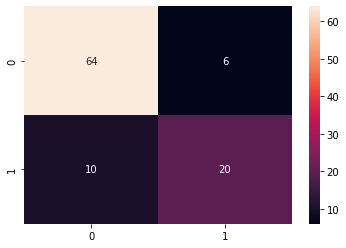

In [69]:
sns.heatmap(confusion_matrix(y_test, Y_predict),annot = True)

In [70]:
feature_names=df.iloc[0:8]
print(feature_names,end='')

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   
5           6        330          115                  5  4.5  3.0  9.34   
6           7        321          109                  3  3.0  4.0  8.20   
7           8        308          101                  2  3.0  4.0  7.90   

   Research  Chance of Admit  
0         1              1.0  
1         1              0.0  
2         1              0.0  
3         1              1.0  
4         0              0.0  
5         1              1.0  
6         1              0.0  
7         0              0.0  

In [71]:
target_name=[str(x) for x in model.classes_]
target_name

['0.0', '1.0']

In [72]:
from sklearn.tree import plot_tree
fig=plt.figure(figsize=(50,30))

<Figure size 3600x2160 with 0 Axes>

[Text(0.45652173913043476, 0.9583333333333334, 'X[5] <= 8.845\nentropy = 0.911\nsamples = 300\nvalue = [202, 98]'),
 Text(0.21739130434782608, 0.875, 'X[5] <= 8.63\nentropy = 0.307\nsamples = 200\nvalue = [189, 11]'),
 Text(0.13043478260869565, 0.7916666666666666, 'X[4] <= 1.75\nentropy = 0.057\nsamples = 152\nvalue = [151, 1]'),
 Text(0.08695652173913043, 0.7083333333333334, 'X[1] <= 103.0\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.043478260869565216, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.13043478260869565, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17391304347826086, 0.7083333333333334, 'entropy = 0.0\nsamples = 148\nvalue = [148, 0]'),
 Text(0.30434782608695654, 0.7916666666666666, 'X[1] <= 105.5\nentropy = 0.738\nsamples = 48\nvalue = [38, 10]'),
 Text(0.2608695652173913, 0.7083333333333334, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.34782608695652173, 0.7083333333333334, 'X[5] <= 8.795\nentropy = 0.874\nsamples

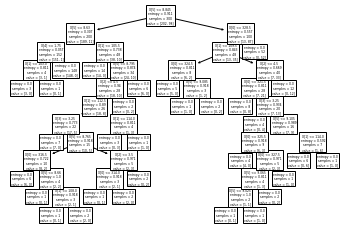

In [73]:
plot_tree(model)

In [70]:
plt.savefig("Decision_tree_visualization.png")

<Figure size 432x288 with 0 Axes>

In [36]:
x=df.iloc[:,1:7]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


In [37]:
from sklearn import tree

In [56]:
sf= StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [57]:
depth=[1,2,3,4,5,6,7,8,9,10]

In [58]:
for d in depth:
    score=cross_val_score(tree.DecisionTreeClassifier(criterion='entropy',max_depth=d,random_state=0),x_train,y_train,cv=sf,scoring='accuracy')
    print('Average score for depth {} is : {}'.format(d,score.mean()))

Average score for depth 1 is : 0.9199999999999999
Average score for depth 2 is : 0.9199999999999999
Average score for depth 3 is : 0.9099999999999999
Average score for depth 4 is : 0.9033333333333333
Average score for depth 5 is : 0.9099999999999999
Average score for depth 6 is : 0.9
Average score for depth 7 is : 0.8933333333333333
Average score for depth 8 is : 0.8933333333333333
Average score for depth 9 is : 0.8933333333333333
Average score for depth 10 is : 0.9
